In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('economic_index.csv')
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2006,12,1.59,4.76,927.12
1,2019,5,9.54,3.41,1370.99
2,2014,1,9.69,5.93,1284.47
3,2010,12,8.28,6.50,1195.08
4,2007,10,3.74,5.44,1040.05


In [3]:
df.drop(columns=['year','month'],axis=1,inplace=True)

In [4]:
df.head()

,interest_rate,unemployment_rate,index_price
0,1.59,4.76,927.12
1,9.54,3.41,1370.99
2,9.69,5.93,1284.47
3,8.28,6.50,1195.08
4,3.74,5.44,1040.05


In [5]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

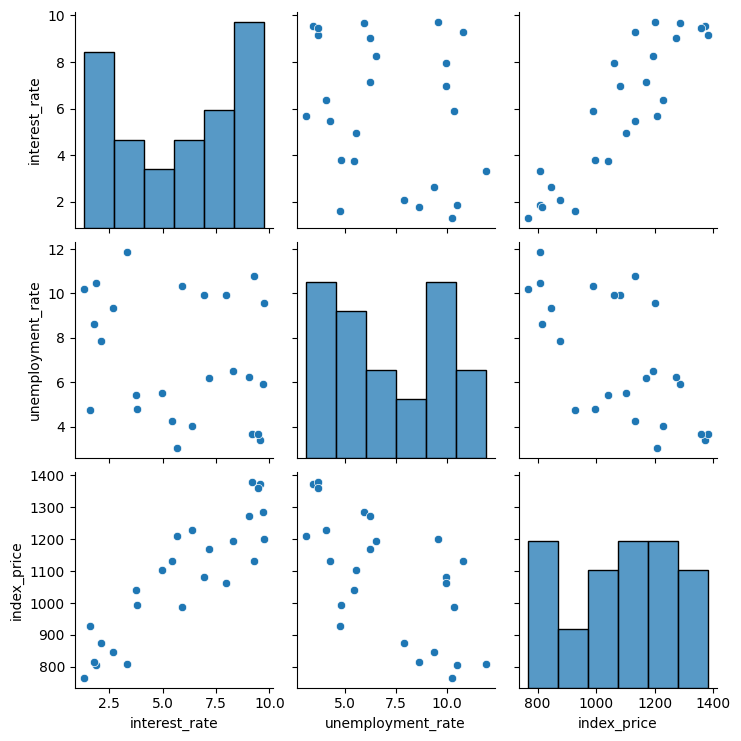

In [6]:
## visualization 

import seaborn as sns
sns.pairplot(df)

In [7]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.257286,0.894194
unemployment_rate,-0.257286,1.000000,-0.649180
index_price,0.894194,-0.649180,1.000000


Text(0, 0.5, 'Unemployment Rate')

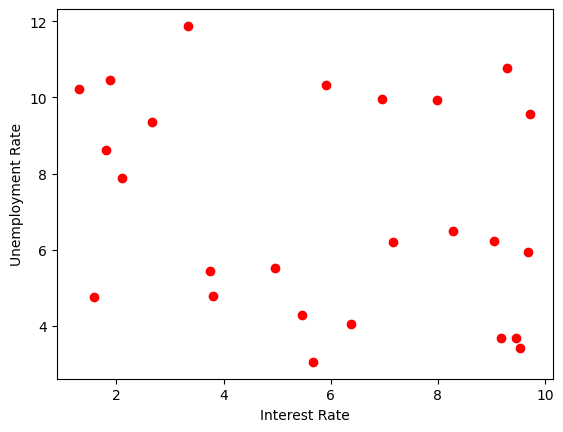

In [9]:
## visualize data more closely 
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='red')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.head()
y        

0      927.12
1     1370.99
2     1284.47
3     1195.08
4     1040.05
5      807.32
6     1170.26
7     1102.17
8      875.83
9     1132.00
10     766.13
11    1379.66
12     809.38
13    1080.79
14     994.41
15    1208.94
16     987.54
17     846.22
18    1201.54
19    1061.05
20    1358.51
21    1272.74
22    1227.36
23    1131.53
24     815.53
Name: index_price, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)





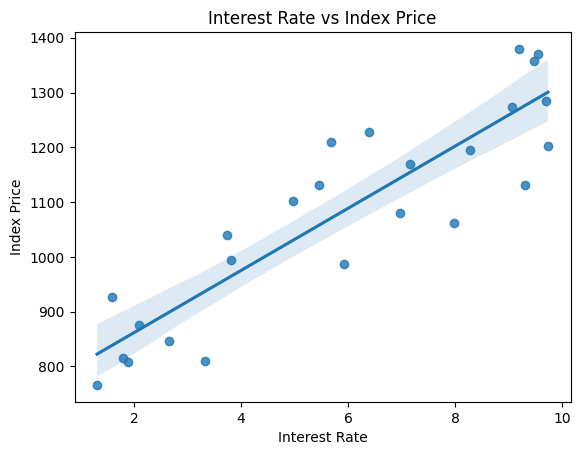

In [16]:
import seaborn as sns
sns.regplot(x=df['interest_rate'], y=df['index_price'])
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.title('Interest Rate vs Index Price')
plt.show()

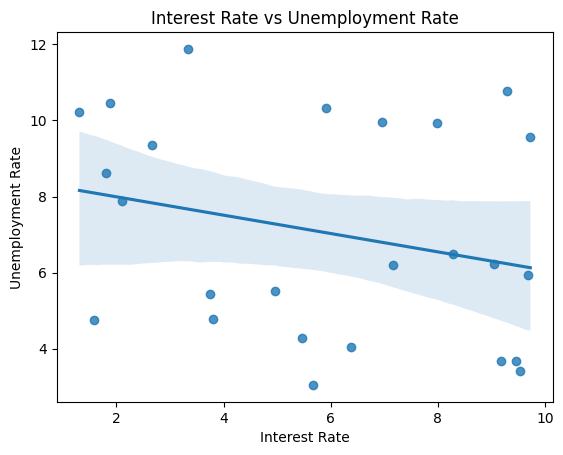

In [17]:
import seaborn as sns
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'])
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.title('Interest Rate vs Unemployment Rate')
plt.show()

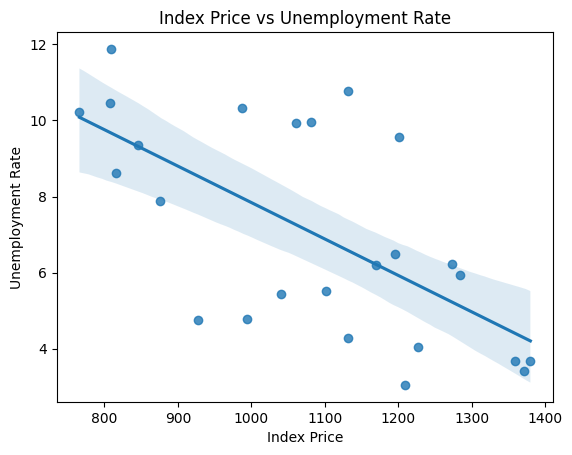

In [18]:
import seaborn as sns
sns.regplot(x=df['index_price'], y=df['unemployment_rate'])
plt.xlabel('Index Price')
plt.ylabel('Unemployment Rate')
plt.title('Index Price vs Unemployment Rate')
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

c:\Users\sachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)


LinearRegression()

In [ ]:
## Cross Validation of the model 
from sklearn.model_selection import cross_val_score

validationscore = cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error',cv=5)

In [27]:
np.mean(validationscore)

np.float64(-643.6277441728249)

In [28]:
y_pred = lr.predict(X_test)
y_pred

array([ 715.88957977, 1050.5189284 ,  907.78696732, 1494.6252312 ,
       2079.25739604, 1499.52420171, 1231.43024445])

In [29]:
# Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)   

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

rmse = np.sqrt(mse) 
print("Root Mean Squared Error:", rmse) 


Mean Squared Error: 115566.03359444664
Mean Absolute Error: 260.4442078165812
Root Mean Squared Error: 339.9500457338499


In [30]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(score)

-3.801918205848117


In [31]:
# display adjusted-R-squaured value of the model 

1 - (1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)

-6.202877308772175

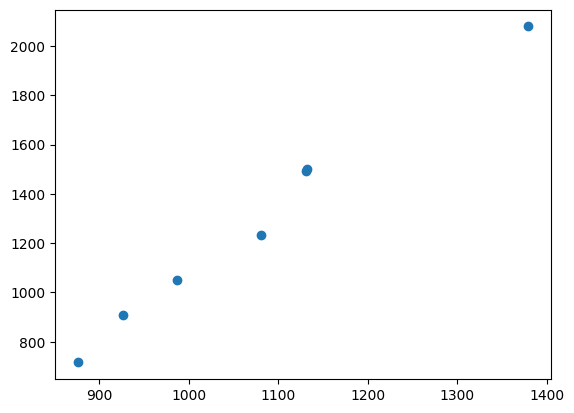

In [32]:
plt.scatter(y_test,y_pred)

In [33]:
residuals = y_test - y_pred 
print(residuals)

8     159.940420
16    -62.978928
0      19.333033
23   -363.095231
11   -699.597396
9    -367.524202
13   -150.640244
Name: index_price, dtype: float64


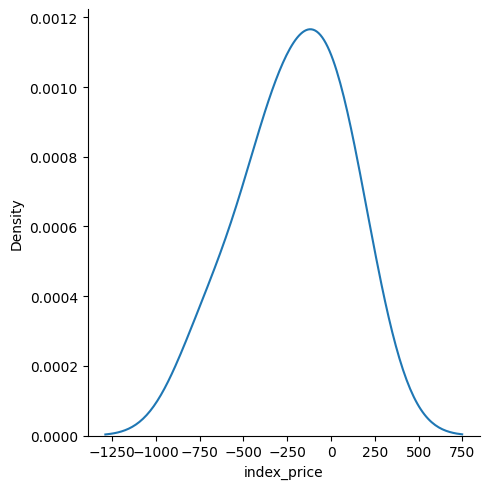

In [35]:
sns.displot(residuals,kind='kde')

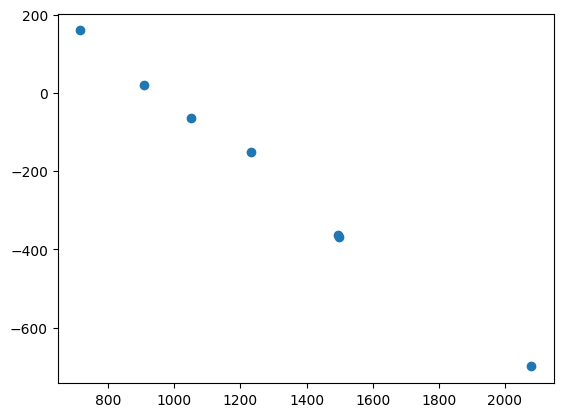

In [36]:
plt.scatter(y_pred,residuals)

In [37]:
 ## OLS Linear Regresssion 
import statsmodels.api as sm

model = sm.OLS(y_train,X_train).fit()

predicition = model.predict(X_test)
print(predicition)

[-369.22986467  -34.60051605 -177.33247713  409.50578676  994.1379516
  414.40475727  146.3108    ]


In [38]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.031
Model:                            OLS   Adj. R-squared (uncentered):             -0.090
Method:                 Least Squares   F-statistic:                             0.2596
Date:                Wed, 23 Apr 2025   Prob (F-statistic):                       0.775
Time:                        18:22:36   Log-Likelihood:                         -151.35
No. Observations:                  18   AIC:                                      306.7
Df Residuals:                      16   BIC:                                      308.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\sachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [40]:
print(lr.coef_)


[142.17362864 -84.745493  ]
